In [47]:
# libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [48]:
#dataset
df=pd.read_csv('spam.csv', encoding='latin-1' )

In [49]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [51]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)

In [52]:
df.columns=['Category', 'Message']

In [53]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [55]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category'>

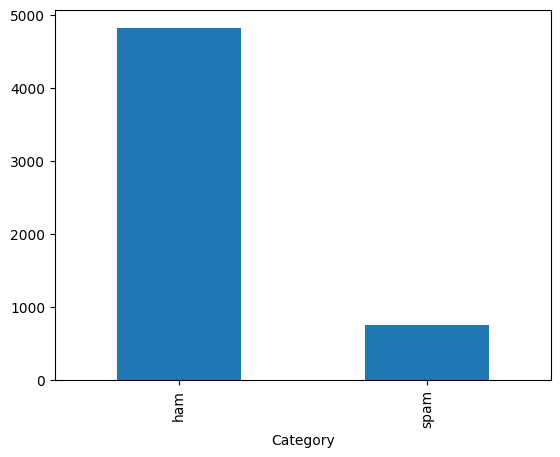

In [21]:
df['Category'].value_counts().plot(kind='bar')

In [56]:
df['Spam']=df['Category'].apply(lambda x:0 if x=='spam' else 1)

In [57]:
df.columns

Index(['Category', 'Message', 'Spam'], dtype='object')

In [58]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [59]:
x=np.array(df["Message"])
y=np.array(df["Spam"])
cv=CountVectorizer()
X=cv.fit_transform(x)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=42)

clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [63]:
sample=input("Enter a message:")
df=cv.transform([sample]).toarray()
print(clf.predict(df))

Enter a message: Subject: Congratulations! You've Won $1 Million!  Dear [Your Name],  We are excited to inform you that you have been selected as the grand prize winner of our exclusive lottery! You've won a staggering $1,000,000!  To claim your prize, simply click on the link below and provide your personal information for verification. Hurry, this offer is valid for a limited time only!  [Malicious Link]  Don't miss this once-in-a-lifetime opportunity to change your life! Act now and claim your winnings immediately.  Best Regards, Lottery Headquarters


[0]


In [64]:
# Accuracy test
clf.score(X_test,y_test)

0.9784688995215312